**QUESTION 2** - Bloom Filter

In [1]:
from hashlib import sha3_256, sha256, blake2b

def my_hash(s):
    return int(sha256(s.lower().encode()).hexdigest(), 16) % size

def my_hash2(s):
    return int(blake2b(s.lower().encode()).hexdigest(), 16) % size

def my_hash3(s):
    return int(sha3_256(s.lower().encode()).hexdigest(), 16) % size

**Implement a Bloom Filter "from scratch" using a bitarray (6 points):**

In [2]:
import bitarray
import string


class BloomFilter3:
    
    def __init__(self, size):
        self._data = bitarray.bitarray(size)
        self._data.setall(0)
        
        
    def build(self, word):
        index = [0] * 3
        index[0] = my_hash(word)
        index[1] = my_hash2(word)
        index[2] = my_hash3(word)

        for i in index:
            self._data[i] = 1
        
        
    def search(self, word):
        index = [0] * 3
        index[0] = my_hash(word)
        index[1] = my_hash2(word)
        index[2] = my_hash3(word)
        
        answer = 0
        
        for i in index:
            answer = answer + self._data[i]
        
        if answer == len(index):
            return word
    
    
    def spellcheck(self, word):
        
        results = []
        
        for i in range(0 , len(word) - 1):
            for character in string.ascii_lowercase: 
                word_temp = list(word)
                word_temp[i] = character
                word_temp = ''.join(word_temp)

                check = self.search(word_temp)
                
                if check is not None:
                    results.append(check)
                    
        return results

**Store the words in the bloom filter (2 points).**

In [3]:
size = 10_000_000
bloom_filter = BloomFilter3(size)
        
with open('words.txt') as f:
    for line in f:
        word = line.strip()
        #print(word)
        
        bloom_filter.build(word)

**Write a function that suggests spelling corrections using the bloom filter (Code in above Class) (8 points)**

In [4]:
bloom_filter.spellcheck('floeer')

['floter', 'flower']

In [5]:
bloom_filter.spellcheck('pitato')

['potato']

**Plot the effect of the size of the filter together with the choice of just the first, the first two, or all three of the above hash functions on the number of words misidentified from typos.json as correct and the number of "good suggestions". (4 points)** 

In [6]:
import json

f = open('typos.json')
  
typos_data = json.load(f)

f.close()

typos_data_misspelt = []

for item in typos_data:
    if item[0] != item[1]:
        typos_data_misspelt.append(item)
        

In [7]:
import bitarray
import string
import numpy as np

class BloomFilter1:
    
    def __init__(self, size):
        self._data = bitarray.bitarray(size)
        self._data.setall(0)
        
        
    def build(self, word):
        index = [0] * 1
        index[0] = my_hash(word)

        for i in index:
            self._data[i] = 1
        
        
    def search(self, word):
        index = [0] * 1
        index[0] = my_hash(word)
        
        answer = 0
        
        for i in index:
            answer = answer + self._data[i]
        
        if answer == len(index):
            return word
    
    
    def spellcheck(self, word):
        
        results = []
        
        for i in range(0 , len(word) - 1):
            for character in string.ascii_lowercase: 
                word_temp = list(word)
                word_temp[i] = character
                word_temp = ''.join(word_temp)

                check = self.search(word_temp)
                
                if check is not None:
                    results.append(check)
                    
        return results
    
    

class BloomFilter2:
    
    def __init__(self, size):
        self._data = bitarray.bitarray(size)
        self._data.setall(0)
        
        
    def build(self, word):
        index = [0] * 2
        index[0] = my_hash(word)
        index[1] = my_hash2(word)

        for i in index:
            self._data[i] = 1
        
        
    def search(self, word):
        index = [0] * 2
        index[0] = my_hash(word)
        index[1] = my_hash2(word)

        answer = 0
        
        for i in index:
            answer = answer + self._data[i]
        
        if answer == len(index):
            return word
    
    
    def spellcheck(self, word):
        
        results = []
        
        for i in range(0 , len(word) - 1):
            for character in string.ascii_lowercase: 
                word_temp = list(word)
                word_temp[i] = character
                word_temp = ''.join(word_temp)

                check = self.search(word_temp)
                
                if check is not None:
                    results.append(check)
                    
        return results
    

In [8]:
n_range = []

for i in range(0,10):
    n_range.append(10**i)

In [9]:
success_counts_1 = []

for size in n_range:
    
    bloom_filter_1 = BloomFilter1(size)
        
    with open('words.txt') as f:
        for line in f:
            word = line.strip()
            #print(word)
            
            bloom_filter_1.build(word)
    
    success = 0
    
    for item in typos_data_misspelt:
        answer = bloom_filter_1.spellcheck(item[0])
        
        if len(answer) <= 3 and (item[1] in answer):
            success = success + 1
            
    success_counts_1.append(success)


In [10]:
success_counts_2 = []

for size in n_range:
    
    bloom_filter_2 = BloomFilter2(size)
        
    with open('words.txt') as f:
        for line in f:
            word = line.strip()
            #print(word)
            
            bloom_filter_2.build(word)
    
    success = 0
    
    for item in typos_data_misspelt:
        answer = bloom_filter_2.spellcheck(item[0])
        
        if len(answer) <= 3 and (item[1] in answer):
            success = success + 1
            
    success_counts_2.append(success)
    

In [11]:
success_counts_3 = []

for size in n_range:
    
    bloom_filter_3 = BloomFilter3(size)
        
    with open('words.txt') as f:
        for line in f:
            word = line.strip()
            #print(word)
            
            bloom_filter_3.build(word)
    
    success = 0
    
    for item in typos_data_misspelt:
        answer = bloom_filter_3.spellcheck(item[0])
        
        if len(answer) <= 3 and (item[1] in answer):
            success = success + 1
            
    success_counts_3.append(success)
    

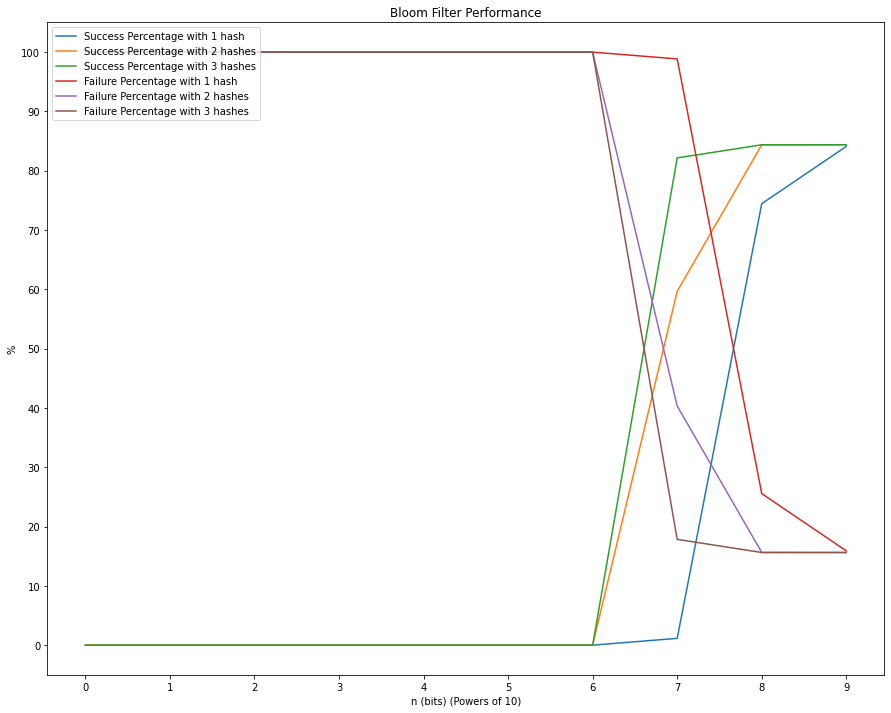

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math

success_percentages_1 = np.array(success_counts_1)*100/len(typos_data_misspelt)
success_percentages_2 = np.array(success_counts_2)*100/len(typos_data_misspelt)
success_percentages_3 = np.array(success_counts_3)*100/len(typos_data_misspelt)

failure_percentages_1 = 100 - success_percentages_1
failure_percentages_2 = 100 - success_percentages_2
failure_percentages_3 = 100 - success_percentages_3

x_axis = np.log10(n_range)

plt.figure(figsize=(15, 12))
plt.plot(x_axis, success_percentages_1, label = 'Success Percentage with 1 hash')
plt.plot(x_axis, success_percentages_2, label = 'Success Percentage with 2 hashes')
plt.plot(x_axis, success_percentages_3, label = 'Success Percentage with 3 hashes')
plt.plot(x_axis, failure_percentages_1, label = 'Failure Percentage with 1 hash')
plt.plot(x_axis, failure_percentages_2, label = 'Failure Percentage with 2 hashes')
plt.plot(x_axis, failure_percentages_3, label = 'Failure Percentage with 3 hashes')


plt.title('Bloom Filter Performance')
plt.ticklabel_format(style='sci', axis='x')
plt.ylabel('%')
plt.xlabel('n (bits) (Powers of 10)')
plt.legend(loc="upper left")

plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.yticks(np.arange(min(success_percentages_1), max(failure_percentages_1)+10, 10))
plt.show()

**Approximately how many bits is necessary for this approach to give good suggestions (as defined above) 90% of the time when using each of 1, 2, or 3 hash functions as above? (5 points)**

Cutoff changed to 80% since no bloomfilter was returning abouve 90%.  
This could have been due to a difference in definition of the metric used for performance

In [35]:
cutoff_1 = np.where(success_percentages_1  >= 80)
cutoff_1

print("The number of bits necessary for good performance as defined about for 1 hash is 10 ^",cutoff_1[0][0])

The number of bits necessary for good performance as defined about for 1 hash is 10 ^ 9


In [37]:
cutoff_2 = np.where(success_percentages_2  >= 80)
cutoff_2

print("The number of bits necessary for good performance as defined about for 2 hashes is 10 ^",cutoff_2[0][0])

The number of bits necessary for good performance as defined about for 2 hashes is 10 ^ 8


In [38]:
cutoff_3 = np.where(success_percentages_3  >= 80)
cutoff_3

print("The number of bits necessary for good performance as defined about for 2 hashes is 10 ^",cutoff_3[0][0])

The number of bits necessary for good performance as defined about for 2 hashes is 10 ^ 7
